<a href="https://colab.research.google.com/github/0vv0xtt/0vv0xtt/blob/main/DS_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [288]:
#importing the libraries
import random
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn import datasets  
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
# I don't know what happened to the color scale of this whole Notebook, it went to a grey scale all a sudden
seed = random.seed(18969556)#my student number


In [289]:
#in this code section, I will be transferring all the data into pandas data fram
file_path = 'https://raw.githubusercontent.com/0vv0xtt/DS-csv/main/theData.csv' #file path to the rating data"
file_path1 = 'https://raw.githubusercontent.com/0vv0xtt/DS-csv/main/theArt.csv' #file path of the artworks"
#data = np.genfromtxt('raw.githubusercontent.com/0vv0xtt/DS-csv/main/theArt.csv',delimiter=',')
npdata = np.genfromtxt('https://raw.githubusercontent.com/0vv0xtt/DS-csv/main/theData.csv',delimiter=',')
data = pd.read_csv(file_path,header = None)
art = pd.read_csv(file_path1) #the pandas data frame that took care of 
#art[art.iloc[:, 5] == 2]
rating=data.iloc[:,0:91]




# question 1&2

Text(0, 0.5, 'mean rating of art work')

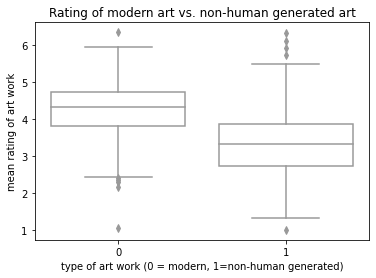

In [ ]:
#code for question1 and 2 - Is classical art more well liked than modern art?
df1_1 = art[art['Source (1 = classical, 2 = modern, 3 = nonhuman)']==1] #classical art work
df1_2 = art[art['Source (1 = classical, 2 = modern, 3 = nonhuman)']==2] #modern art work
'''
after looking at the dataframes, I know that #1-35 is classical art, ##36-70 is modern art #71-91 is nonhuman art'''
#I am taking the row mean to first get the individual's mean preference on type of artwork
classical=npdata[:,0:35]
classicalrowMeans = np.mean(classical,axis=1)   
modern=npdata[:,35:70]
modernrowMeans = np.mean(modern,axis=1)   
nonhuman=npdata[:,70:91]
nonhumanrowMeans = np.mean(nonhuman,axis=1)   

classical_m=npdata[:,0:35].mean()
modern_m=npdata[:,35:70].mean()
nonhuman_m = npdata[:,70:91].mean()
#conducting the paired t-test
classical_greater_modern = stats.ttest_rel(classicalrowMeans,modernrowMeans,alternative='greater')
modern_nonhuman=stats.ttest_rel(modernrowMeans,nonhumanrowMeans)
artwork_r = [classicalrowMeans,modernrowMeans]
artwork_r2 = [modernrowMeans,nonhumanrowMeans]
'''
fig = sns.boxplot(data=artwork_r, color='white').set(title='Rating of classical art vs. modern art')
plt.xlabel("type of art work (0 = classical, 1=modern)")
plt.ylabel("mean rating of art work")
'''
fig2 = sns.boxplot(data=artwork_r2, color='white').set(title='Rating of modern art vs. non-human generated art')
plt.xlabel("type of art work (0 = modern, 1=non-human generated)")
plt.ylabel("mean rating of art work")


In [ ]:
modern.mean(),modern_m

(4.256571428571428, 4.256571428571428)

# question 3


In [ ]:
#question 3, does women give higher art preference rating than men?
male = data[data.iloc[:,216]==1] #male
female =  data[data.iloc[:,216]==2] #female
female_rating = female.iloc[:,0:91]
male_rating = male.iloc[:,0:91]
m_mean = male_rating.mean(axis=1)
#m_mean = m_mean.to_numpy #np array that consists of each male's individual preference
f_mean = female_rating.mean(axis=1)

#f_mean = f_mean.,to_numpy
stats.ttest_ind(f_mean,m_mean,alternative='greater')
female

,0,1,2,3,4,5,6,7,8,9,...,211,212,213,214,215,216,217,218,219,220
0,7,6,2,6,3,3,5,4,6,6,...,5.0,2.0,3.0,4.0,19.0,2.0,3.0,0.0,2.0,2.0
2,7,6,6,6,5,6,7,6,5,5,...,4.0,1.0,2.0,2.0,18.0,2.0,2.0,1.0,1.0,2.0
3,6,6,5,7,6,5,4,6,6,6,...,5.0,3.0,5.0,4.0,21.0,2.0,5.0,1.0,3.0,0.0
5,5,5,5,6,4,5,4,5,4,5,...,5.0,3.0,4.0,4.0,24.0,2.0,4.0,0.0,2.0,0.0
6,4,5,4,7,4,6,6,5,6,4,...,5.0,5.0,2.0,5.0,19.0,2.0,6.0,2.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,6,6,6,7,5,6,3,5,5,6,...,5.0,4.0,2.0,4.0,18.0,2.0,2.0,0.0,0.0,1.0
290,5,3,4,5,4,5,5,5,5,5,...,3.0,1.0,2.0,4.0,19.0,2.0,2.0,1.0,1.0,1.0
291,6,6,4,7,4,5,4,3,4,2,...,3.0,3.0,5.0,4.0,18.0,2.0,2.0,0.0,1.0,2.0
294,5,7,7,7,4,5,5,6,4,7,...,5.0,4.0,5.0,5.0,20.0,2.0,6.0,2.0,3.0,0.0


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


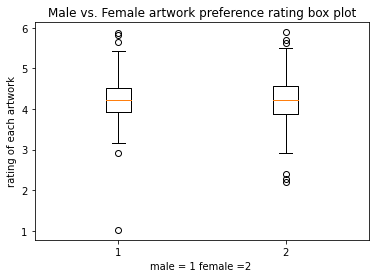

In [ ]:
rating1 = [m_mean,f_mean]
plt.boxplot(rating1)
plt.ylabel("rating of each artwork")
plt.xlabel("male = 1 female =2 ")
plt.title("Male vs. Female artwork preference rating box plot")
plt.show()


# question 4

Text(0, 0.5, 'rating on art work')

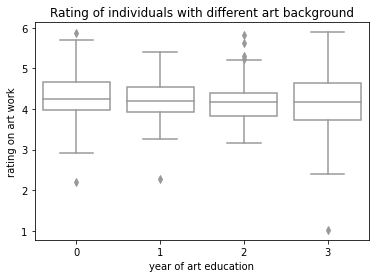

In [ ]:
#4) Is there a difference in the preference ratings of users with some art background (some art education) vs. none? 
n_artedu = data[data.iloc[:,218]==0]#never had any art education
n_artedu_rating = n_artedu.iloc[:,0:91] #only looking at the rating part
n_artedu_mean = n_artedu_rating.mean(axis=1) #taking each person's average rating on each art piece
w_artedu = data[data.iloc[:,218]!=0]#had art education
w_artedu_rating = w_artedu.iloc[:,0:91]
w_artedu_mean = w_artedu_rating.mean(axis=1)


one_artedu = data[data.iloc[:,218]==1]#one year
two_artedu = data[data.iloc[:,218]==2]
three_artedu = data[data.iloc[:,218]==3]
one_artedu_rating = one_artedu.iloc[:,0:91]
two_artedu_rating = two_artedu.iloc[:,0:91]
three_artedu_rating = three_artedu.iloc[:,0:91]
one_artedu_mean = one_artedu_rating.mean(axis=1)
two_artedu_mean = two_artedu_rating.mean(axis=1)
three_artedu_mean = three_artedu_rating.mean(axis=1)


indep_t_test = stats.ttest_ind(n_artedu_mean,w_artedu_mean)
#anova_test= 
anova= stats.f_oneway(n_artedu_mean,one_artedu_mean,two_artedu_mean,three_artedu_mean)
edu_rating= [n_artedu_mean,one_artedu_mean,two_artedu_mean,three_artedu_mean]
fig1 = sns.boxplot(data=edu_rating, color='white').set(title='Rating of individuals with different art background')
plt.xlabel("year of art education")
plt.ylabel("rating on art work")

# Question 5

coefficient of determination: 0.14770631709322313
intercept: 6.715961777245145
slope: [-0.61311182]


Text(0.5, 1.0, 'energy ratings vs. artwork preference ratings')

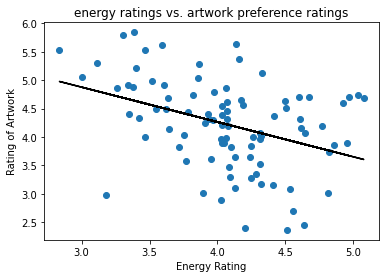

In [ ]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
data1 = data.iloc[:,0:182].dropna(axis=1) #remove any individual with nan
energy = np.array(data1.iloc[:,91:182]).mean(axis=0)
#energy=np.array(energy.unstack())
rating1=np.array(data1.iloc[:,0:91]).mean(axis=0)
#rating1 = np.array(rating1.unstack())


x=energy.reshape(-1,1)
y=rating1

#npdata1 = np.array(data1)
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")
r = np.corrcoef(energy,rating)
y_pred = LinearRegression().fit(x, y).predict(x)

plt.plot(energy,rating1,'o') 

plt.plot(x, y_pred, color="black")
plt.xlabel('Energy Rating') #Suitable x-axis label
plt.ylabel('Rating of Artwork') #Suitable y-axis label
plt.title('r = {:.3f}'.format(r[0,1]))
plt.title("energy ratings vs. artwork preference ratings")

coefficient of determination: 0.1583154634124163
intercept: 6.161489980205684
slope: [-0.49903807]
RMSE =  0.17975345358305578


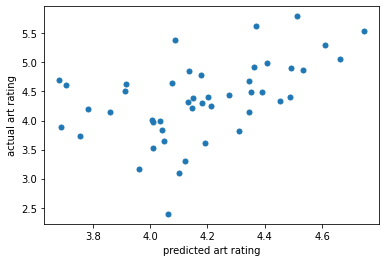

In [ ]:
# split into train and test

x=energy.reshape(-1,1)
y=rating1

x_train,x_test,y_train,y_test = train_test_split(x,y, train_size = 0.5, test_size=0.5)
x=x_train
y=y_train
regr = LinearRegression()
regr.fit(x_train,y_train)
r_sq = regr.score(x_train, y_train)

beta= regr.coef_ 
yInt = regr.intercept_
yHat =beta*x_test+yInt
rmse = np.sqrt(np.mean(yHat-y_test)**2)
plt.plot(yHat,y_test,'o',markersize=5)
plt.xlabel('predicted art rating')
plt.ylabel('actual art rating')
plt.title('')

print(f"coefficient of determination: {r_sq}")
print(f"intercept: {regr.intercept_}")
print(f"slope: {regr.coef_}")
print("RMSE = ", rmse)

In [ ]:
''' previous model
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")
y_pred = LinearRegression().fit(x, y).predict(x)
#var1 = 2 #Which is our first variable
#var2 = 3 #2nd variable to relate it to

r = np.corrcoef(energy,rating)
plt.plot(energy,rating1,'o') 
plt.plot(x, y_pred, color="black")
plt.xlabel('Energy Rating') #Suitable x-axis label
plt.ylabel('Rating of Artwork') #Suitable y-axis label
plt.title('r = {:.3f}'.format(r[0,1]))
plt.title("energy ratings vs. artwork preference ratings")
'''


1

In [ ]:
from scipy.stats import spearmanr
energy1 = data.iloc[:,91:182].mean(axis=0)
rating2=rating.mean()
rho, p = spearmanr(energy1, rating2)

# Question 6

coefficient of determination:  0.11834951206667088
intercept:  2.3843007446916316
Betas:  [-0.01427299  0.18155663  0.44227186]
RMSE =  0.029923682825138406


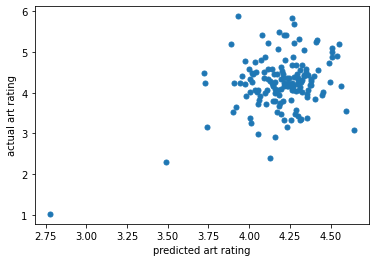

In [291]:
from sklearn import linear_model
#data.loc[:,215], data.loc[:,216],data.loc[:,218]
X = data.iloc[: , [215, 216]].copy() 
X.rename(columns={215:"age"},inplace = True)
X.rename(columns={216:"gender"},inplace = True)
energy = data.iloc[:,91:182].mean(axis=1)
#energy = energy.to_frame()
X['energy'] = energy
X=X.fillna(0)
Y = rating.mean(axis=1)
x_train,x_test,y_train,y_test = train_test_split(X,Y, train_size = 0.5, test_size=0.5)

reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)
Intercept=reg.intercept_
Coefficients=reg.coef_
yHat =Coefficients[0]*x_test.iloc[:,0]+Coefficients[1]*x_test.iloc[:,1]+Coefficients[2]*x_test.iloc[:,2]+Intercept
#r_sq = regr.score(x_train, y_train)

rmse = np.sqrt(np.mean(yHat-y_test)**2)
plt.plot(yHat,y_test,'o',markersize=5)
plt.xlabel('predicted art rating')
plt.ylabel('actual art rating')
plt.title('')

SS_Residual = sum((yHat-y_test)**2)       
SS_Total = sum((y_test-np.mean(y_test))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total

print("coefficient of determination: ", r_squared)
print("intercept: ", Intercept)
print("Betas: ",Coefficients)
print("RMSE = ", rmse)
#r = np.corrcoef(X,Y)
#reg.score(X, Y),Intercept,Coefficients


In [ ]:
x_test

,age,gender,energy
256,22.0,1.0,4.692308
245,18.0,2.0,4.032967
116,20.0,2.0,4.340659
221,21.0,2.0,4.373626
91,19.0,2.0,4.032967
...,...,...,...
38,0.0,0.0,3.912088
126,18.0,2.0,4.175824
12,20.0,2.0,3.967033
76,20.0,2.0,4.274725


In [292]:
'''q6 = pd.concat([Y,energy,X],axis=1).dropna()
x=q6.iloc[:,0]
y=q6.iloc[:,1:4]
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size = 0.5, test_size=0.5)
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)
Intercept=reg.intercept_
Coefficients=reg.coef_
'''

'q6 = pd.concat([Y,energy,X],axis=1).dropna()\nx=q6.iloc[:,0]\ny=q6.iloc[:,1:4]\nx_train,x_test,y_train,y_test = train_test_split(x,y, train_size = 0.5, test_size=0.5)\nreg = linear_model.LinearRegression()\nreg.fit(x_train, y_train)\nIntercept=reg.intercept_\nCoefficients=reg.coef_\n'

#Question 7

Text(0.5, 1.0, 'average preference ratings vs. average energy rating')

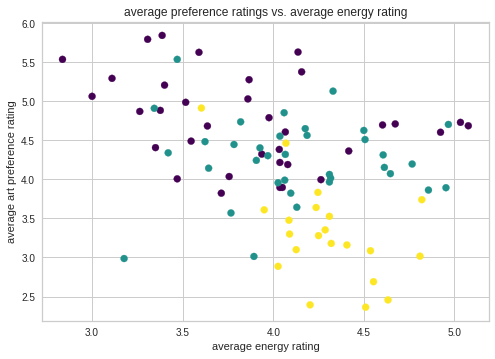

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LogisticRegression
from scipy.special import expit # this is the logistic sigmoid function
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
energy_m = data.iloc[:,91:182].mean(axis=0) #91 mean energy of art
rating1=rating.mean(axis=0) #91 mean rating of art


plt.scatter(energy_m,rating1,c=art.iloc[:,5].T,cmap = mpl.cm.viridis)
a,b,c = energy_m[0:35].mean(),energy_m[35:70].mean(), energy_m[70:91].mean()
#plt.plot([3.8710476190476193, 4.74152380952381], [4.122, 4.256571428571428], [4.28936507936508,3.308095238095238],marker='*')
#plt.plot([a,b,c], [classical_m,modern_m,nonhuman_m],marker='o',ms="20") #taking the mean of each art in energy and rating point
plt.xlabel("average energy rating")
plt.ylabel('average art preference rating')
plt.title("average preference ratings vs. average energy rating")




In [ ]:
a,b,c,classical_m,modern_m,nonhuman_m

91     3.866667
92     4.136667
93     3.350000
94     3.386667
95     4.080000
         ...   
177    4.086667
178    4.286667
179    3.603333
180    4.246667
181    3.950000
Length: 91, dtype: float64

In [ ]:
yOutcomes = rating1.to_numpy()
predictors = energy_m.to_numpy()

x=predictors.tolist()
y=yOutcomes.tolist()


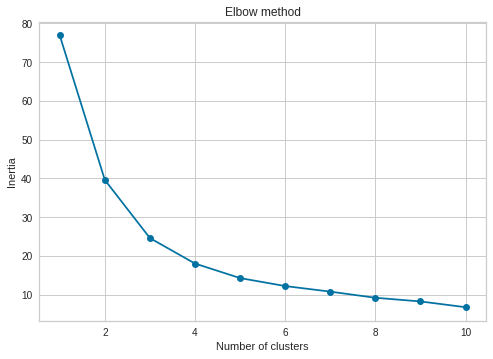

In [ ]:
data7 = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data7)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


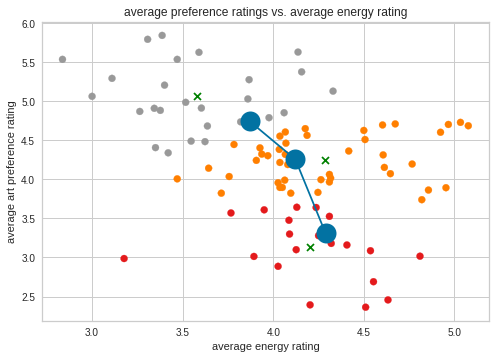

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data7)

plt.scatter(x, y, c=kmeans.labels_,cmap = 'Set1')

plt.xlabel("average energy rating")
plt.ylabel('average art preference rating')
plt.title("average preference ratings vs. average energy rating")
a,b,c = energy_m[0:35].mean(),energy_m[35:70].mean(), energy_m[70:91].mean()
#plt.plot([3.8710476190476193, 4.74152380952381], [4.122, 4.256571428571428], [4.28936507936508,3.308095238095238],marker='*')
#plt.plot([a,b,c], [classical_m,modern_m,nonhuman_m],marker='o',ms="20") #taking the mean of each art in energy and rating

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], marker="x",color='green')
plt.plot([a,b,c], [classical_m,modern_m,nonhuman_m],marker='o',ms="20")
plt.show()

# Question 8 

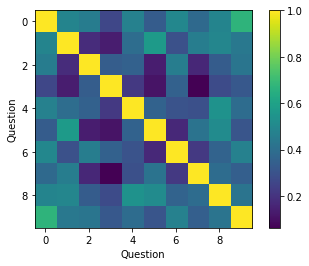

,205,206,207,208,209,210,211,212,213,214
0,1.433969,-0.399826,1.047284,0.267776,1.299525,-0.221076,1.078435,-0.257178,-0.300782,0.488968
1,-0.274844,-0.399826,-0.211217,0.267776,-1.151008,-0.221076,0.032901,0.629001,-1.097298,0.488968
2,-0.274844,-1.172463,-0.211217,0.267776,-0.334163,-0.221076,0.032901,-1.143357,-1.097298,-1.216457
3,1.433969,0.372811,1.047284,0.267776,1.299525,-0.221076,1.078435,0.629001,1.292250,0.488968
4,-0.274844,0.372811,-0.211217,-0.753344,1.299525,-0.221076,-1.012632,1.515180,-0.300782,-0.363745
...,...,...,...,...,...,...,...,...,...,...
295,1.433969,1.918085,-0.211217,0.267776,-0.334163,0.669455,-3.103699,0.629001,-0.300782,0.488968
296,-0.274844,0.372811,-1.469718,-0.753344,-0.334163,0.669455,-1.012632,0.629001,-0.300782,-0.363745
297,-1.129250,-1.172463,-0.211217,0.267776,0.482681,-0.221076,0.032901,-1.143357,-1.097298,-1.216457
298,-1.129250,-1.172463,-0.211217,0.267776,-1.151008,-0.221076,-2.058166,-1.143357,-0.300782,-2.069170


In [ ]:
question = np.array(range(1,11))#Keep track of the question numbers
data8 = data.iloc[:,205:215] #take out the Dark energy question part
data8=data8.dropna()

corrM = data8.corr()#correlation matrix for self-image
plt.imshow(corrM)
plt.xlabel('Question')
plt.ylabel('Question')
plt.colorbar()
plt.show()
#standardizing the data
normalized_data=(data8-data8.mean())/data8.std()
normalized_data=normalized_data.dropna(axis=0) #I dropped the rows that contained NAN values
pca = PCA().fit(normalized_data) 
pca2 = PCA().fit(data8)
#eigenvalues
eigVals = pca.explained_variance_
eigVals2 = pca2.explained_variance_
#eigenvectors
loadings = pca.components_ 
loadings2 = pca2.components_
rotatedData = pca.fit_transform(normalized_data)
varExplained = eigVals/sum(eigVals)*100
normalized_data

43.137
14.183
7.957
7.147
5.953
5.514
5.121
4.185
3.726
3.077


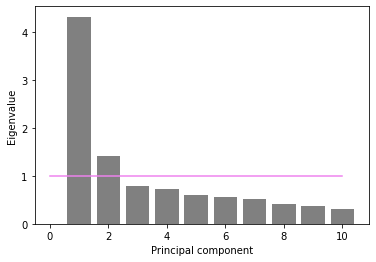

Number of factors selected by Kaiser criterion: 2
Number of factors selected by elbow criterion: 1
Number of factors to account for at least 90% variance: 8


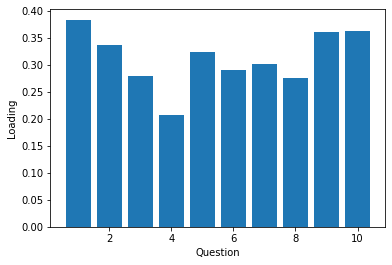

In [ ]:
for ii in range(len(varExplained)):
   print(varExplained[ii].round(3))
numQuestions1 = len(question)
x = np.linspace(1,numQuestions1,numQuestions1)
plt.bar(x, eigVals, color='grey')
plt.plot([0,numQuestions1],[1,1],color='violet') # some violet pride
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.show()
kaiserThreshold = 1
print('Number of factors selected by Kaiser criterion:', np.count_nonzero(eigVals > kaiserThreshold))
print('Number of factors selected by elbow criterion: 1') #Due to visual inspection by primate
threshold = 90 
eigSum = np.cumsum(varExplained)
print('Number of factors to account for at least 90% variance:', np.count_nonzero(eigSum < threshold) + 1)
whichPrincipalComponent = 0  # Select and look at one factor at a time, in Python indexing
plt.bar(x,loadings[whichPrincipalComponent,:]*-1) # note: eigVecs multiplied by -1 because the direction is arbitrary
#and Python reliably picks the wrong one. So we flip it.
plt.xlabel('Question')
plt.ylabel('Loading')
plt.show() # Show bar plot

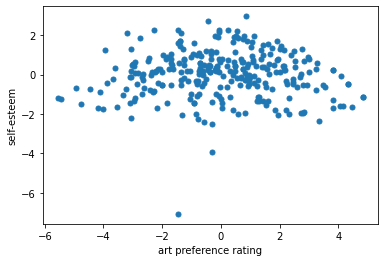

,P1
0,0.383642
1,0.336625
2,0.278656
3,0.206871
4,0.324187
5,0.290979
6,0.302347
7,0.275281
8,0.361731
9,0.362284


In [ ]:
plt.plot(rotatedData[:,0]*-1,rotatedData[:,1]*-1,'o',markersize=5) 

plt.xlabel('art preference rating')
plt.ylabel('self-esteem')
plt.show()
P8 = loadings[whichPrincipalComponent,:]*-1
pd.DataFrame(P8, columns=['P1'])

#Question 9

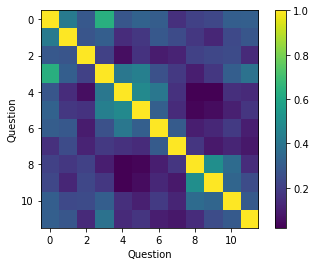

In [ ]:
#Q5 dark personality traitrunning a PCA first

question_n = np.array(range(1,13))#Keep track of the question numbers
data5 = data.iloc[:,182:194] #take out the Dark energy question part
data5=data5.dropna()

corrM = data5.corr()#correlation matrix for Dark energy
plt.imshow(corrM)
plt.xlabel('Question')
plt.ylabel('Question')
plt.colorbar()
plt.show()
#standardizing the data
normalized_data=(data5-data5.mean())/data5.std()
normalized_data=normalized_data.dropna(axis=0) #I dropped the rows that contained NAN values
pca = PCA().fit(normalized_data) 
pca2 = PCA().fit(data5)
#eigenvalues
eigVals = pca.explained_variance_
eigVals2 = pca2.explained_variance_
#eigenvectors
loadings = pca.components_ 
loadings2 = pca2.components_
rotatedData = pca.fit_transform(normalized_data)
varExplained = eigVals/sum(eigVals)*100
#for ii in range(len(varExplained)):
 #   print(varExplained[ii].round(3))'''



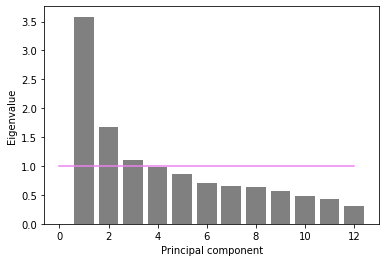

Number of factors selected by Kaiser criterion: 3
Number of factors selected by elbow criterion: 1
Number of factors to account for at least 90% variance: 10


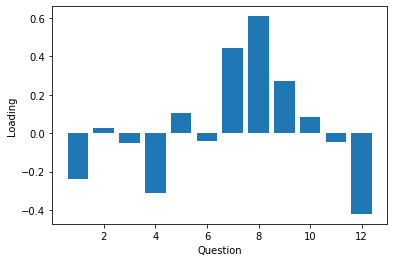

In [ ]:
    
#plotting
numQuestions = len(question_n)
x = np.linspace(1,numQuestions,numQuestions)
plt.bar(x, eigVals, color='grey')
plt.plot([0,numQuestions],[1,1],color='violet') # some violet pride
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.show()
kaiserThreshold = 1
print('Number of factors selected by Kaiser criterion:', np.count_nonzero(eigVals > kaiserThreshold))
print('Number of factors selected by elbow criterion: 1') #Due to visual inspection by primate
threshold = 90 
eigSum = np.cumsum(varExplained)
print('Number of factors to account for at least 90% variance:', np.count_nonzero(eigSum < threshold) + 1)
whichPrincipalComponent = 2 # Select and look at one factor at a time, in Python indexing
plt.bar(x,loadings[whichPrincipalComponent,:]*-1) # note: eigVecs multiplied by -1 because the direction is arbitrary
#and Python reliably picks the wrong one. So we flip it.
plt.xlabel('Question')
plt.ylabel('Loading')
plt.show() # Show bar plot


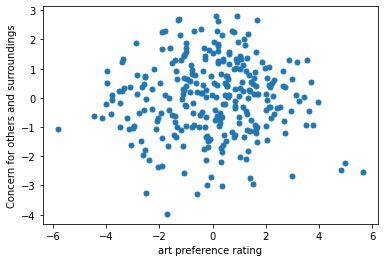

In [ ]:
plt.plot(rotatedData[:,0]*-1,rotatedData[:,1]*-1,'o',markersize=5) 

plt.xlabel('art preference rating')
plt.ylabel('Concern for others and surroundings')
plt.show()



In [ ]:
P = loadings[whichPrincipalComponent,:]*-1
pd.DataFrame(P,  columns = ["P"])


,P
0,-0.238183
1,0.028716
2,-0.053256
3,-0.311828
4,0.105307
5,-0.040553
6,0.446176
7,0.608868
8,0.272306
9,0.084911


In [ ]:
normalized_data

,182,183,184,185,186,187,188,189,190,191,192,193
0,1.368242,0.485870,0.544870,-0.076876,-0.931478,0.036780,-0.994245,-0.944753,-0.003914,0.292529,-0.189691,1.065946
1,1.368242,-0.410150,-1.128028,0.832824,0.791908,0.907247,0.681515,-0.167043,-0.003914,-0.662394,0.665423,1.065946
2,0.544978,-1.306171,0.544870,-0.986576,-0.931478,-0.833686,-0.156365,-0.167043,-0.003914,0.292529,0.665423,-0.668889
3,-0.278287,1.381891,0.544870,-0.076876,-0.069785,-0.833686,0.681515,-1.722463,-0.003914,0.292529,-0.189691,-0.668889
4,-0.278287,0.485870,0.544870,0.832824,-0.069785,0.907247,0.681515,-0.167043,-1.115592,0.292529,-0.189691,0.198529
...,...,...,...,...,...,...,...,...,...,...,...,...
295,-0.278287,0.485870,-1.964478,-0.076876,-0.069785,0.036780,0.681515,-0.944753,-0.003914,0.292529,0.665423,-0.668889
296,0.544978,-0.410150,-0.291579,0.832824,0.791908,0.907247,-0.156365,-0.167043,-1.115592,-0.662394,-0.189691,0.198529
297,1.368242,0.485870,0.544870,1.742523,-0.069785,1.777713,1.519395,1.388377,-0.003914,1.247452,-0.189691,1.065946
298,0.544978,0.485870,0.544870,-0.076876,-0.931478,-0.833686,0.681515,-0.167043,-0.003914,0.292529,-1.044805,0.198529


# Question 10

In [ ]:
# I will try to use demographic data to predict 


#cleaning the data, 1-2 are replaced as 1 - 'left',0 - others
data_c =data.iloc[:,215:221].dropna(axis=0)
data_c[217] = data_c[217].replace(2,1)
data_c[217] =data_c[217].replace(3,0)
data_c[217] =data_c[217].replace(4,0)
data_c[217] =data_c[217].replace(5,0)
data_c[217] =data_c[217].replace(6,0)

left = data_c[data_c[217]==1].reset_index().drop('index', axis=1)
nleft =data_c[ data_c[217]==0].reset_index().drop('index', axis=1)
left#,nleft.reset_index(),data_c.dropna().reset_index()
data_c.rename(columns={215:"age"},inplace = True)
data_c.rename(columns={216:"gender"},inplace = True)
data_c.rename(columns={218:"art education"},inplace = True)
data_c.rename(columns={219:"sophistication"},inplace = True)
data_c.rename(columns={220:"artistic"},inplace = True)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
#codes from https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c
numTrees = 50
x = np.array(data_c.drop(217,axis =1)) #drop the predicting variable from the data set
y=np.array(data_c[217]) #predicting variable

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3) #spliting the data
rf = RandomForestClassifier(n_estimators = 20,max_depth = 3) #dealing with binary outcomes
rf.fit(x_train, y_train) #making prediction
#trace the accuracy
predictions = rf.predict(x_test)
modelAccuracy = accuracy_score(y_test,predictions)
print('Random forest model accuracy:',modelAccuracy)

Random forest model accuracy: 0.6547619047619048


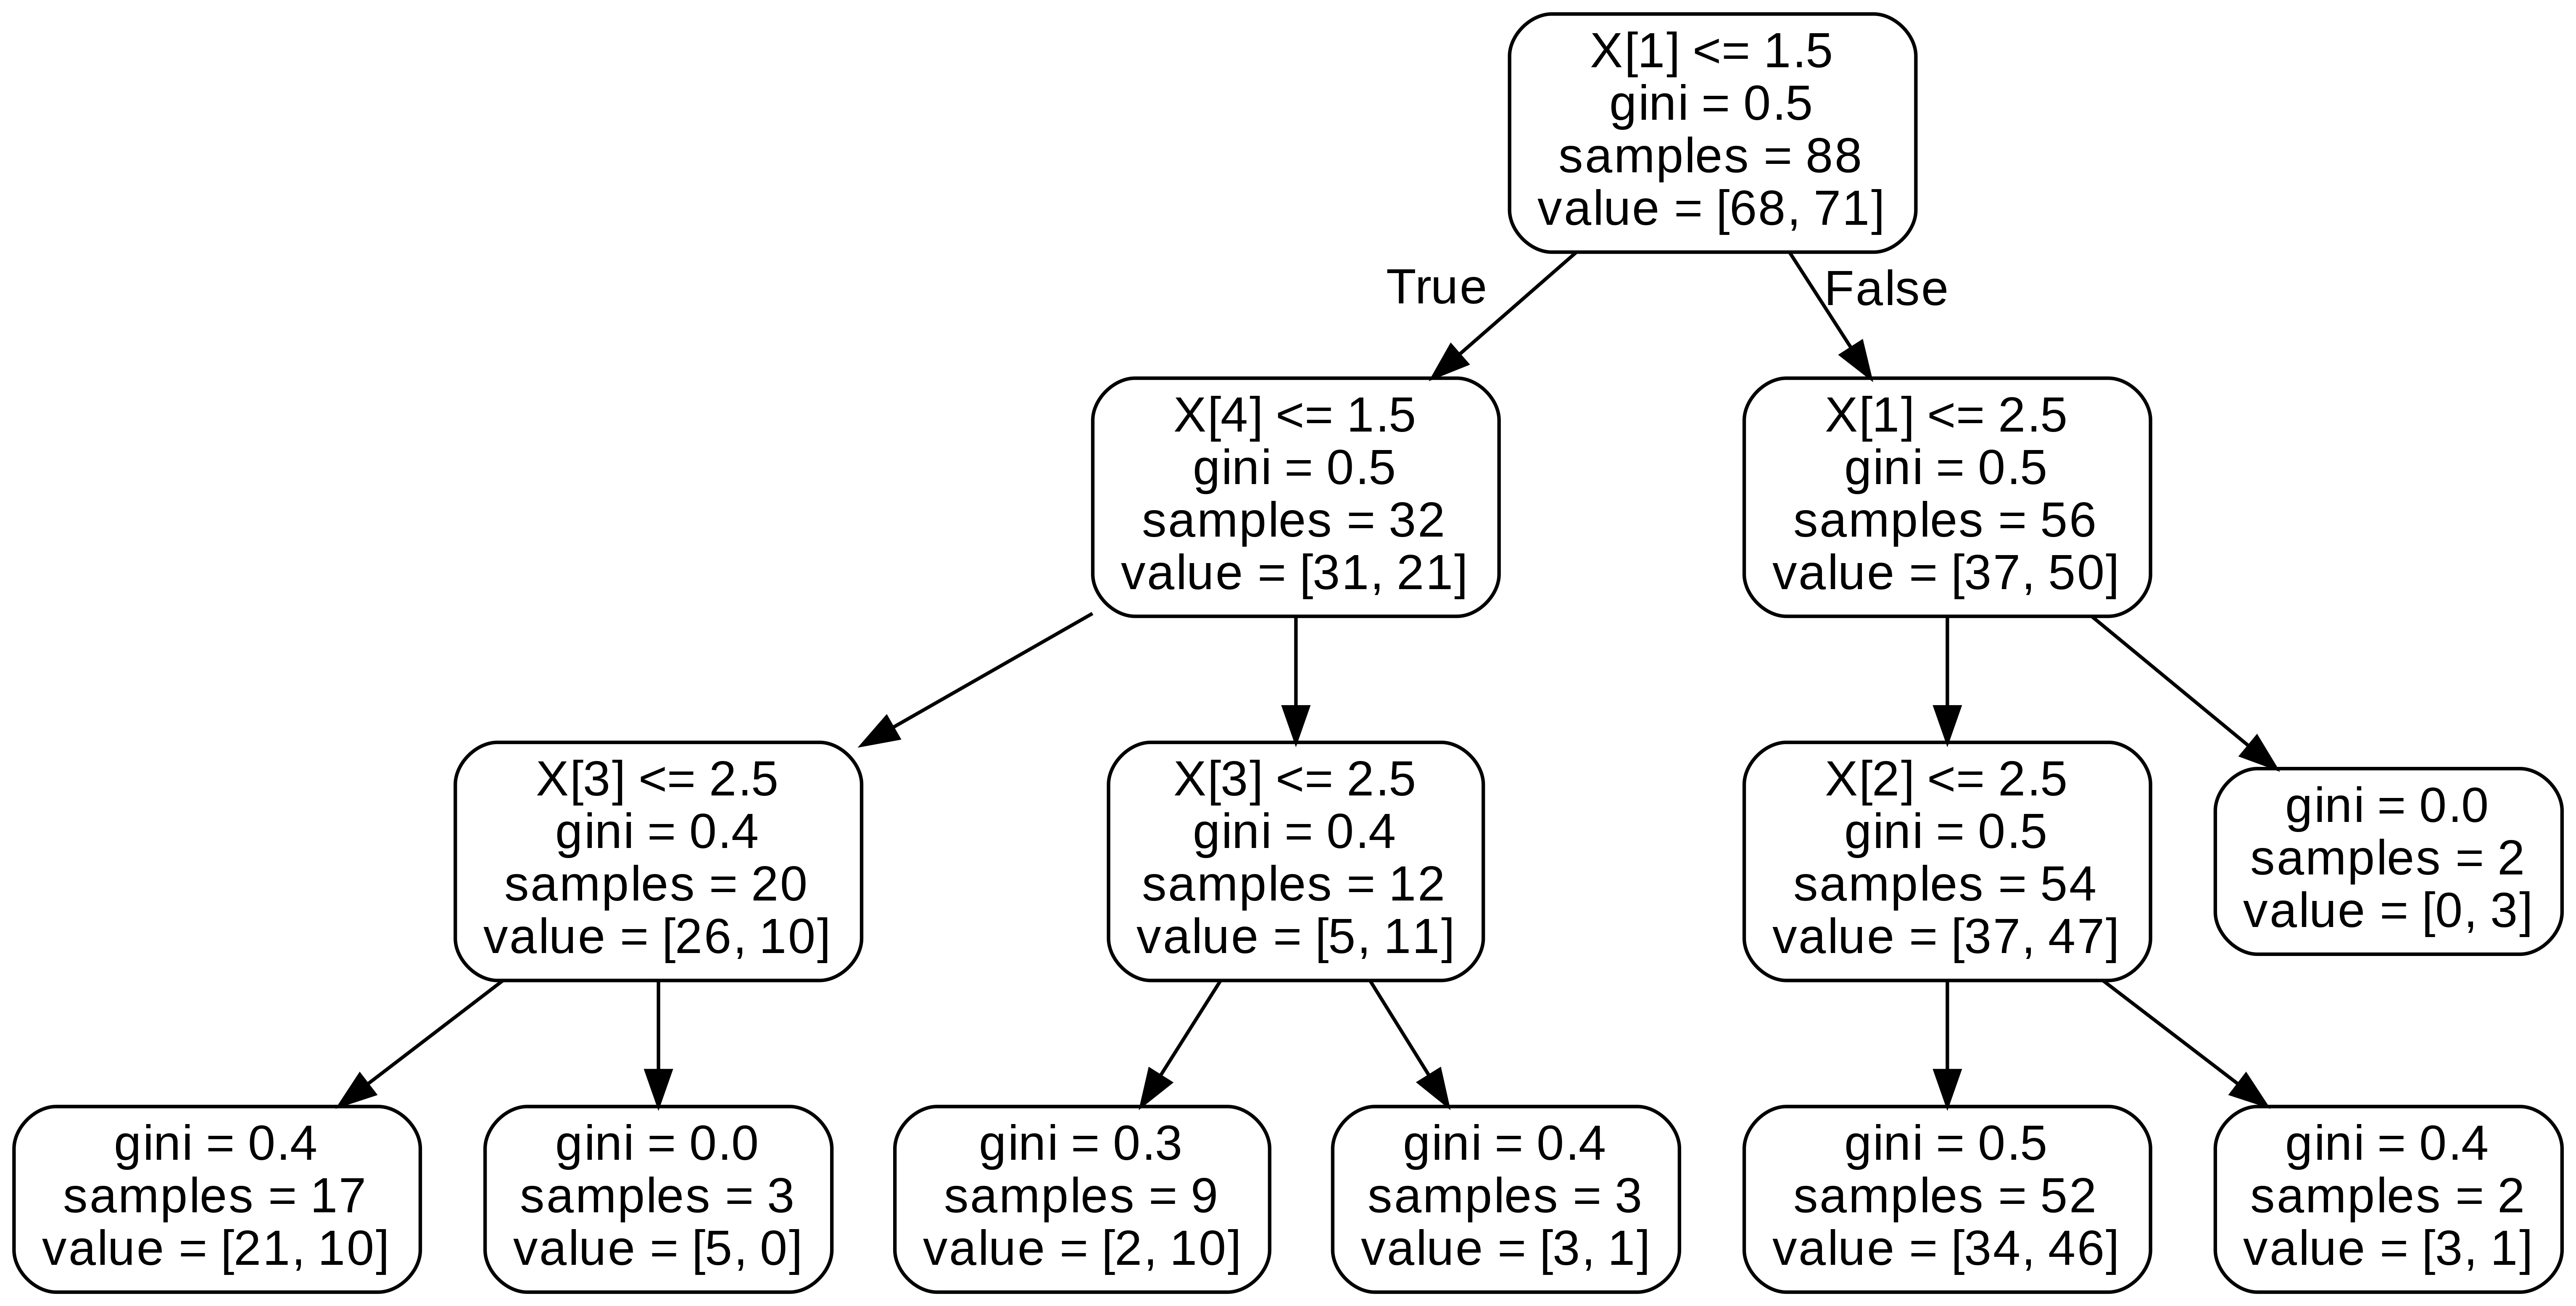

In [ ]:
# Import tools needed for visualization
xlist = list(data_c.drop(217,axis =1).columns)

from sklearn.tree import export_graphviz
import pydot

tree = rf.estimators_[5] 
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', rounded = True, precision = 1)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')


In [ ]:
pd.DataFrame(rf.feature_importances_, index = ["Age(0)","Gender(1)", "Art education(2)", "Sophistication(3)", "Artistic(4)"]).sort_values(0,ascending=False) # check the importance of each variable
 

,0
Art education(2),0.268911
Artistic(4),0.233443
Sophistication(3),0.193879
Age(0),0.184610
Gender(1),0.119156


# scratch


'\nplt.title("age vs. political")\nplt.ylabel("political view (1-left, 2-non left)")\nplt.xlabel("age")'

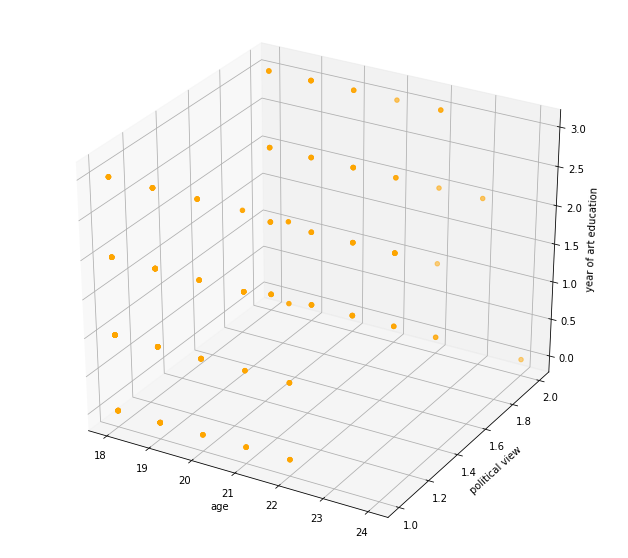

In [ ]:
fig = plt.figure(figsize=(11,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(data[215],data_c[217], data[218], c="orange")
#plt.scatter(data[215], data[218],data_c[217])

ax.set_xlabel('age')
ax.set_zlabel('year of art education')
ax.set_ylabel('political view')

'''
plt.title("age vs. political")
plt.ylabel("political view (1-left, 2-non left)")
plt.xlabel("age")'''


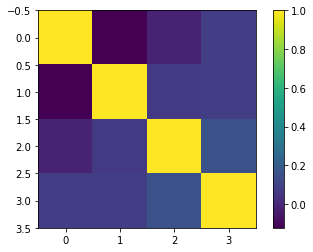

array([[19.,  2.,  0.,  2.],
       [20.,  1.,  1.,  3.],
       [18.,  2.,  1.,  1.],
       ...,
       [19.,  1.,  2.,  0.],
       [19.,  2.,  2.,  2.],
       [19.,  1.,  2.,  3.]])

In [ ]:
yOutcomes = politics.to_numpy()
predictorsdf =data[[215,216,218,219]]
predictors = data[[215,216,218,219]].to_numpy() #taking age, gender, education, sophistication, 
r = predictorsdf.corr()
plt.imshow(r) 
plt.colorbar()
plt.show()


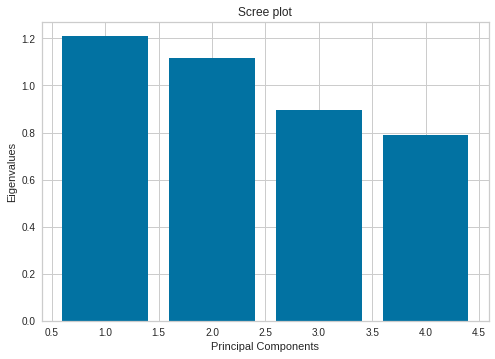

30.144
27.823
22.317
19.716


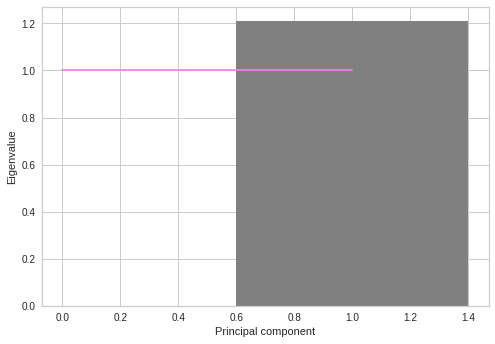

Number of factors selected by Kaiser criterion: 2
Number of factors selected by elbow criterion: 1
Number of factors to account for at least 90% variance: 4


In [ ]:
question = np.array([range(4)])
zscoredData = stats.zscore(predictorsdf.dropna(axis=0))

# Initialize PCA object and fit to our data:
pca = PCA().fit(zscoredData)

# Eigenvalues: Single vector of eigenvalues in decreasing order of magnitude
eigVals = pca.explained_variance_

# Loadings (eigenvectors): Weights per factor in terms of the original data.
loadings = pca.components_*-1

# Rotated Data - simply the transformed data:
origDataNewCoordinates = pca.fit_transform(zscoredData)*-1

# Scree plot:
numPredictors = 4
plt.bar(np.linspace(1,numPredictors,numPredictors),eigVals)
plt.title('Scree plot')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.show()

varExplained = eigVals/sum(eigVals)*100

for ii in range(len(varExplained)):
   print(varExplained[ii].round(3))
numQuestions1 = len(question)
x = np.linspace(1,numQuestions1,numQuestions1)
plt.bar(x, eigVals, color='grey')
plt.plot([0,numQuestions1],[1,1],color='violet') # some violet pride
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.show()
kaiserThreshold = 1
print('Number of factors selected by Kaiser criterion:', np.count_nonzero(eigVals > kaiserThreshold))
print('Number of factors selected by elbow criterion: 1') #Due to visual inspection by primate
threshold = 90 
eigSum = np.cumsum(varExplained)
print('Number of factors to account for at least 90% variance:', np.count_nonzero(eigSum < threshold) + 1)


In [ ]:
politics = data.iloc[:,217]
politics = politics.replace(2,1)
politics =politics.replace(3,2)
politics =politics.replace(4,2)
politics =politics.replace(5,2)
politics =politics.replace(6,2)


0      2.0
1      2.0
2      1.0
3      2.0
4      2.0
      ... 
295    2.0
296    1.0
297    1.0
298    1.0
299    1.0
Name: 217, Length: 300, dtype: float64

In [ ]:
zscoredData


array([-4.04395526e-01,  1.48628486e-01, -1.46265135e+00, -1.38754933e+00,
        3.25617177e-02,  1.10447246e+00, -2.61018931e-01,  1.75990832e+00,
        2.07397134e+00,  1.98521440e+00, -1.95422825e+00,  7.22134869e-01,
       -1.05983139e+00, -1.55140829e+00, -9.71074452e-01, -2.51407972e+00,
       -1.21686290e+00,  1.24784905e+00, -1.36023950e+00,  5.25188995e-03,
       -6.30226794e-02, -5.61952225e-02, -6.29701605e-01,  4.08071849e-01,
       -8.75490055e-01, -2.17953433e+00, -1.64016523e+00, -2.88853947e-02,
       -1.79089447e-01, -7.18458546e-01,  1.89593227e-01, -4.18050440e-01,
       -1.12127851e+00, -1.40803170e+00, -5.61952225e-02,  1.19322940e+00,
       -1.57556699e-03, -1.31927476e+00, -8.61835141e-01, -1.47630627e+00,
        2.51040340e-01, -5.61952225e-02,  5.17311160e-01,  1.11129991e+00,
       -1.92744361e-01, -1.81767911e+00,  8.92821292e-01,  1.84866526e+00,
        5.03656247e-01,  9.06476206e-01,  5.44620988e-01, -1.21686290e+00,
       -3.49775871e-01,  